In [ ]:
"""Authors :
Inventado, Charles Fredric G.
Rodelas, John Vincent B.
Valles, James Vincent V.
4CSE - Laboratory Activity: Time Series & Distribution Analysis Using Python
"""

'Authors :\nInventado, Charles Fredric G.\nRodelas, John Vincent B.\nValles, James Vincent V.\n4CSE - Laboratory Activity: Time Series & Distribution Analysis Using Python\n'

## Time/distribution-based questions the Tres Sigmas group wanted to figure out.

1. How different manufacturers benchmarks evolved over the years?
(Time Chart focused)
2. How are CO2 emissions and fuel efficiency distributed across different vehicle types? (Distribution chart focused)
3. How have CO2 emissions per mile and fuel economy changed across model years? (Time Chart Focused)



# **DATASET PREPARATION**

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading of the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://drive.google.com/file/d/1qEmIcOgU1QDKpODdm8RNxU_RBvhIukgo/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

## QUESTION 1 - How different manufacturers benchmarks evolved over the years ,Time Chart focused
Assessed by Acceleration 0 to 60 seconds, Horsepower or HP, and Weight in pounds.

## Table Exploration - Q1 - All columns yet

In [ ]:
csv_gdrive = pd.read_csv(path)
csv_gdrive.head()

Real-World CO2 (g/mi)_noNull_scaled  Horsepower (HP)_noNull_scaled  \
0                             0.688846                       0.242445   
1                             0.632598                       0.238472   
2                             0.597150                       0.240062   
3                             0.568432                       0.227775   
4                             0.566479                       0.218185   

   Acceleration (0-60 time in seconds)_Scaled_noNull  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.510292   
4                                           0.547584   

   Weight(lbs)_scaled_noNull Manufacturer  Model Year (Renew)  \
0                   0.608856          All                1975   
1                   0.611675          All                1976   
2                   0.597073          All                1977   
3                   0.557099          All                1978   
4                   0.548136          All                1979   

  Regulatory Class Vehicle Type  Weight(lbs)_noNull  \
0              All          All            4060.399   
1              All          All            4079.198   
2              All          All            3981.818   
3              All          All            3715.238   
4              All          All            3655.465   

   Footprint (sq. ft.)_noNull  ...  \
0                         0.0  ...   
1                         0.0  ...   
2                         0.0  ...   
3                         0.0  ...   
4                         0.0  ...   

   Turbocharged Engine of Gasoline ICE Vehicles_noNull  2-Cycle MPG_noNull  \
0                                                0.0              15.33300   
1                                                0.0              16.70719   
2                                                0.0              17.70553   
3                                                0.0              18.60678   
4                                                0.0              18.69594   

   Real-World MPG_noNull  Real-World MPG_City_noNull  \
0               13.05970                    12.01552   
1               14.22136                    13.18117   
2               15.06743                    14.00580   
3               15.83777                    14.68193   
4               15.91271                    14.87711   

   Real-World MPG_Hwy_noNull  Real-World CO2 (g/mi)_noNull  \
0                   14.61167                     680.59612   
1                   15.73946                     625.02238   
2                   16.60587                     589.99880   
3                   17.52390                     561.62442   
4                   17.39245                     559.69495   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                          739.73800                         608.31160   
1                          674.34147                         564.74348   
2                          634.71366                         535.34732   
3                          605.82637                         507.59981   
4                          598.63764                         512.09833   

   Acceleration (0-60 time in seconds)_noNull  Ton-MPG (Real-World)_NoNull  
0                                      0.0000                     26.90068  
1                                      0.0000                     29.32518  
2                                      0.0000                     30.37961  
3                                     13.6221                     29.88164  
4                                     14.6176                     29.52594  

[5 rows x 25 columns]

In [ ]:
# Example of descriptive statistics for a column
# Using 'Horsepower (HP)_noNull' as an example column
if 'csv_gdrive' not in globals():
    csv_gdrive = pd.read_csv(path)

display(csv_gdrive['Horsepower (HP)_noNull'].describe())

count    5500.000000
mean      145.534697
std        99.689379
min         0.000000
25%        76.528850
50%       155.685450
75%       209.258150
max       566.456600
Name: Horsepower (HP)_noNull, dtype: float64

In [ ]:
# Example of frequency counts for a column
# Using 'Manufacturer' as an example column
display(csv_gdrive['Manufacturer'].value_counts())

Manufacturer
All           400
Ford          400
GM            400
Stellantis    400
Honda         400
Mazda         400
VW            400
Toyota        400
Nissan        400
Kia           350
Mercedes      350
Subaru        300
BMW           300
Hyundai       300
Tesla         300
Name: count, dtype: int64

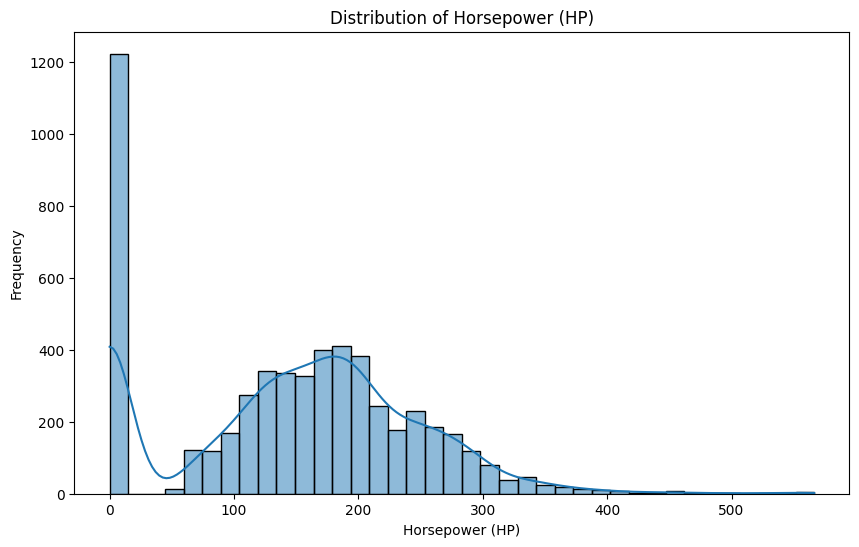

In [ ]:
# Example of a histogram for a numerical column
# Using 'Horsepower (HP)_noNull' as an example
plt.figure(figsize=(10, 6))
sns.histplot(data=csv_gdrive, x='Horsepower (HP)_noNull', kde=True)
plt.title('Distribution of Horsepower (HP)')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Frequency')
plt.show()

## Exploring ALL Manufacturers in Grey

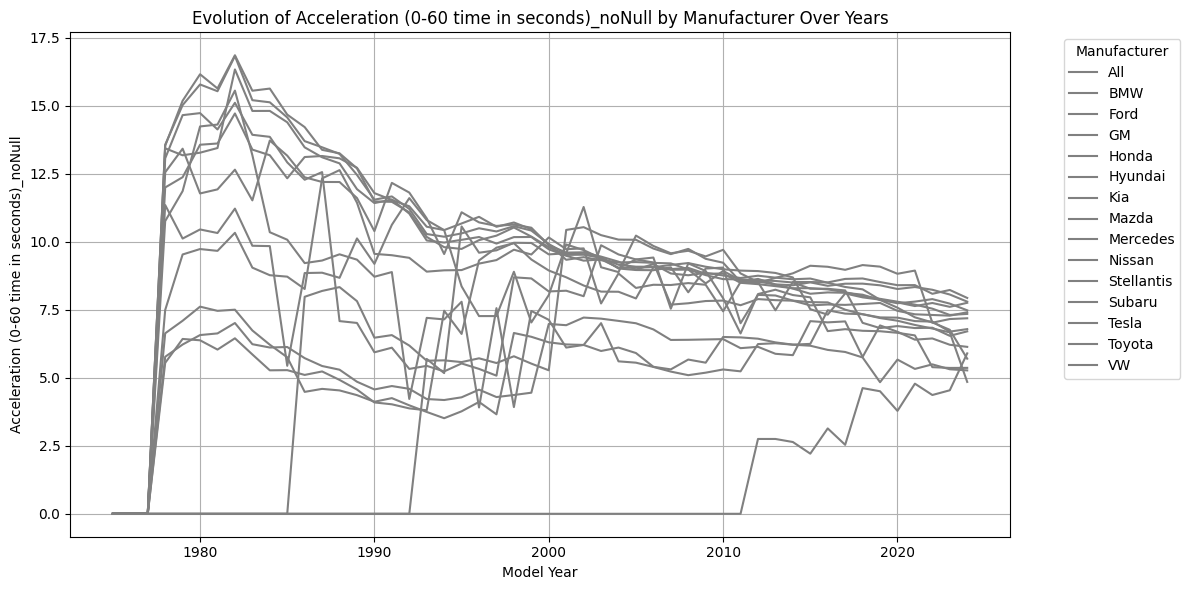

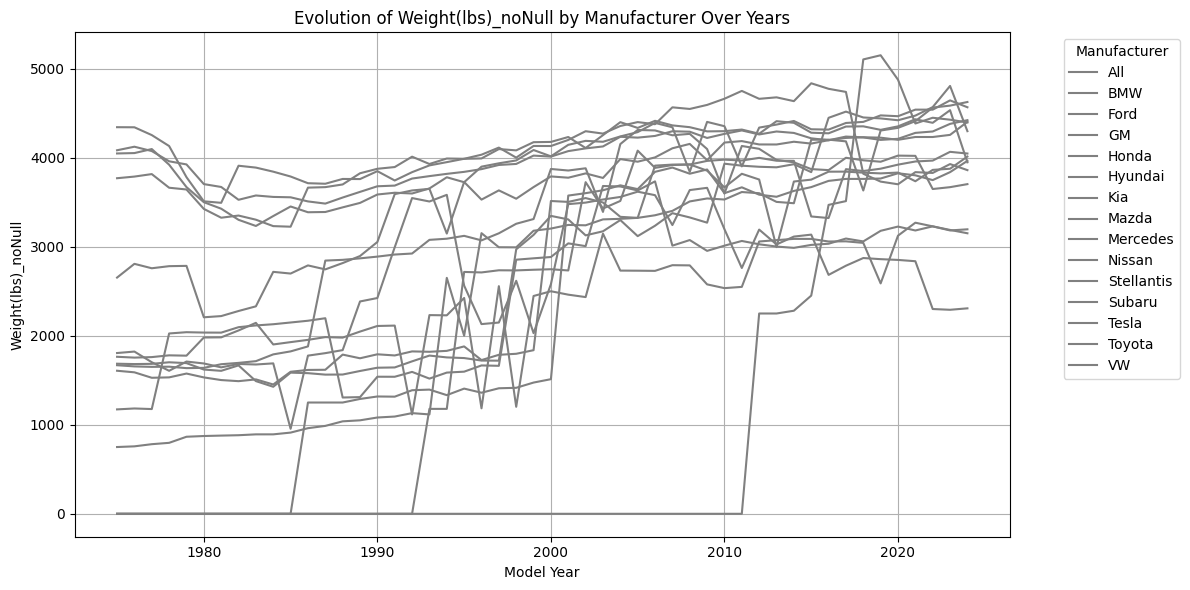

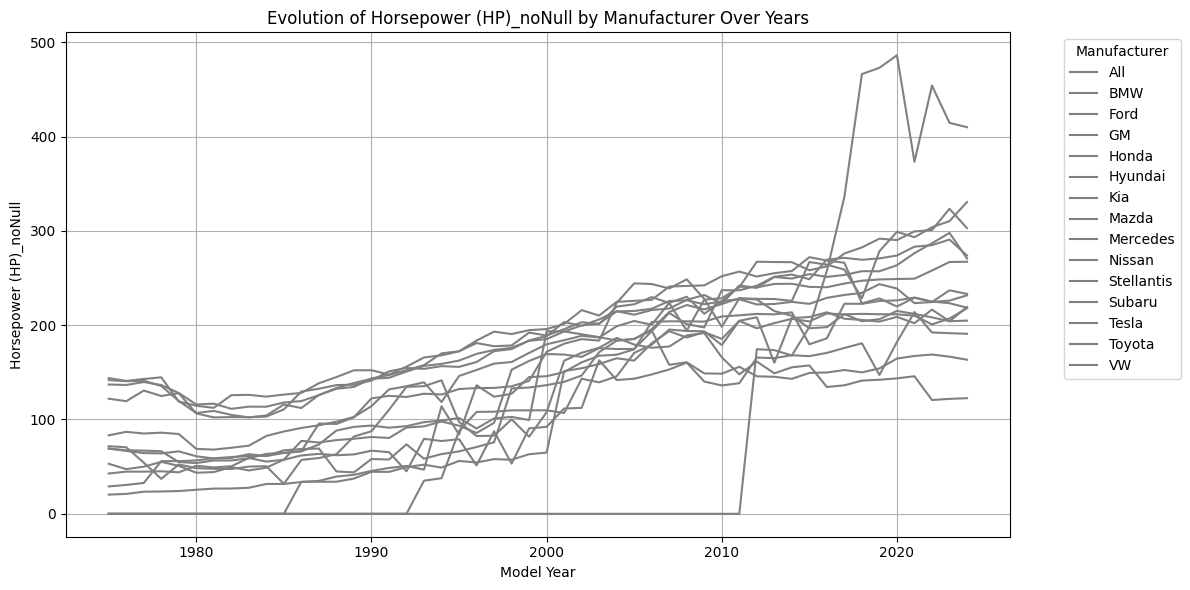

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of manufacturers
manufacturers = manufacturer_evolution['Manufacturer'].unique()

# Define the metrics to plot
metrics = ['Acceleration (0-60 time in seconds)_noNull', 'Weight(lbs)_noNull', 'Horsepower (HP)_noNull']

# Create a line plot for each metric, colored in grey for all manufacturers
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=manufacturer_evolution, x='Model Year (Renew)', y=metric, hue='Manufacturer', palette=['grey'] * len(manufacturers))
    plt.title(f'Evolution of {metric} by Manufacturer Over Years')
    plt.xlabel('Model Year')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Focused on Honda, Hyundai, and Toyota

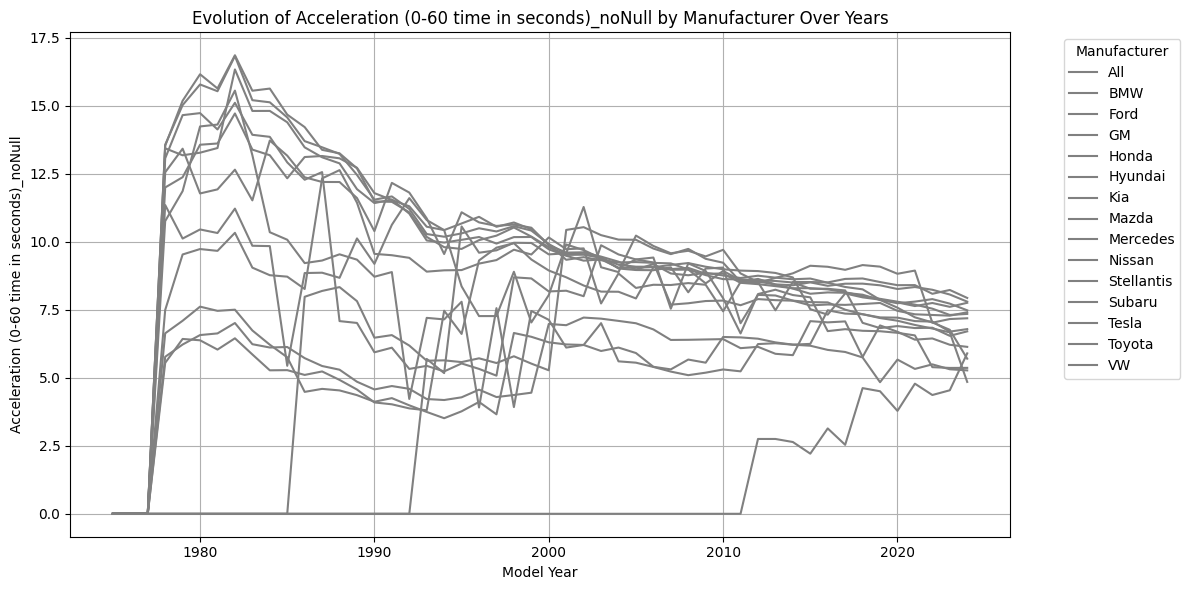

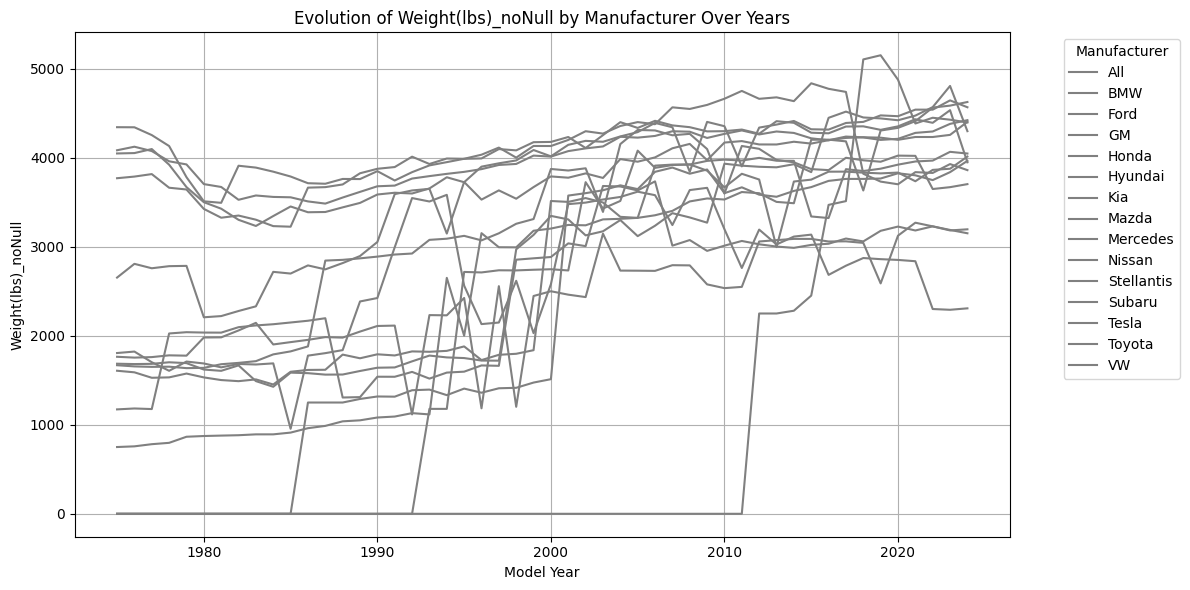

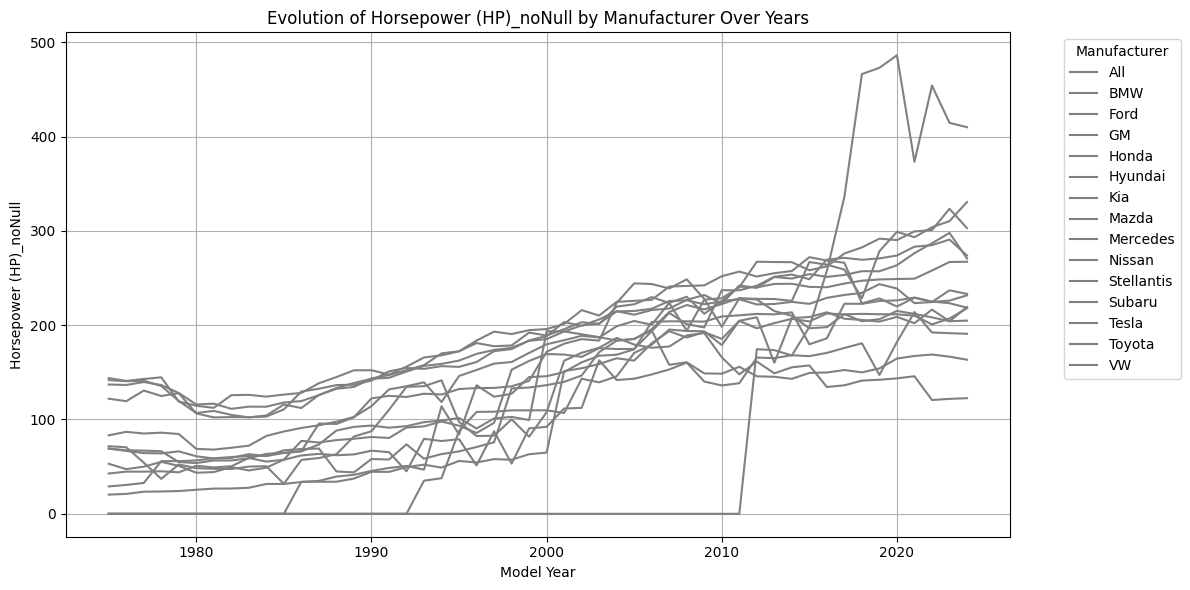

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of manufacturers
manufacturers = manufacturer_evolution['Manufacturer'].unique()

# Define the metrics to plot
metrics = ['Acceleration (0-60 time in seconds)_noNull', 'Weight(lbs)_noNull', 'Horsepower (HP)_noNull']

# Create a line plot for each metric, colored in grey for all manufacturers
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=manufacturer_evolution, x='Model Year (Renew)', y=metric, hue='Manufacturer', palette=['grey'] * len(manufacturers))
    plt.title(f'Evolution of {metric} by Manufacturer Over Years')
    plt.xlabel('Model Year')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### 3 Manufacturers Focused on 2003 - 2023

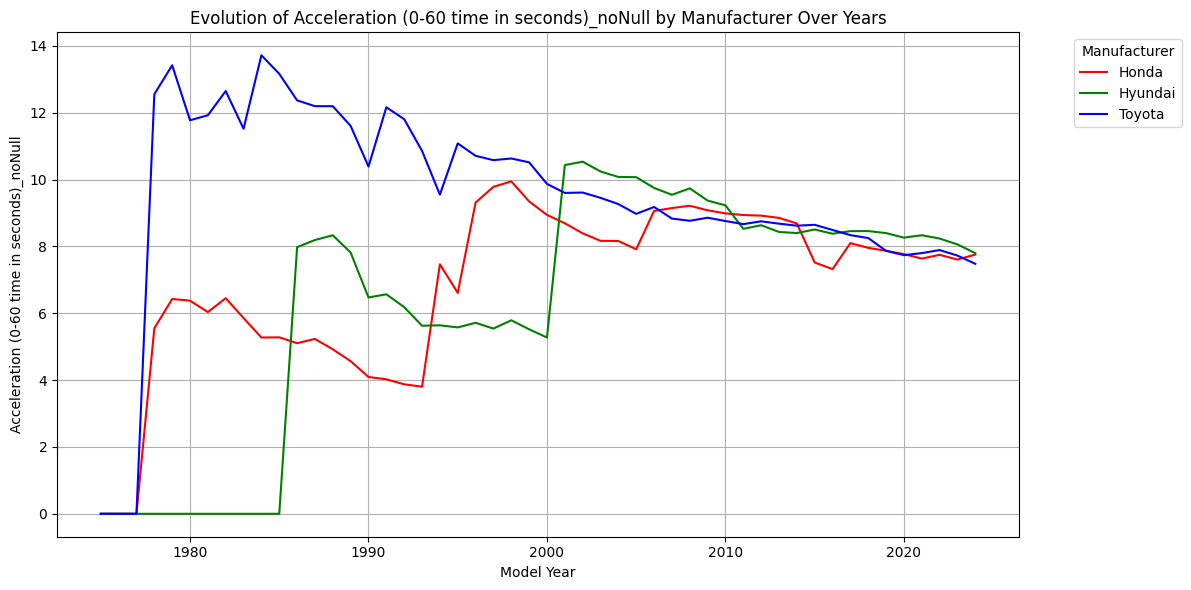

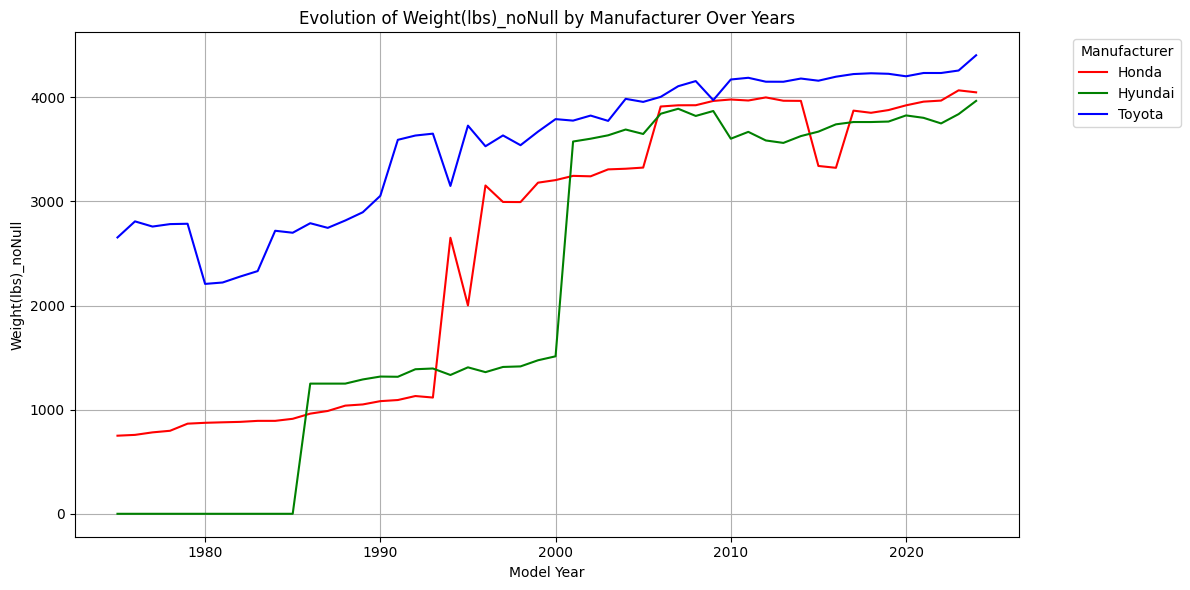

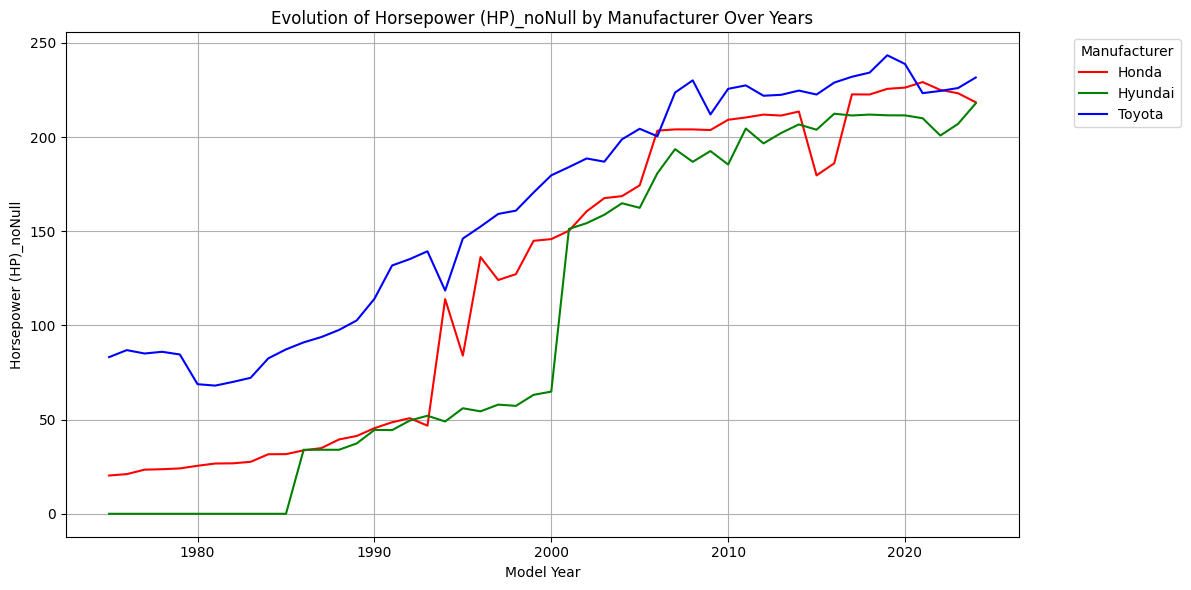

In [ ]:
# Define the metrics to plot
metrics = ['Acceleration (0-60 time in seconds)_noNull', 'Weight(lbs)_noNull', 'Horsepower (HP)_noNull']

# Define the manufacturers to highlight and their colors
highlight_manufacturers = ['Honda', 'Hyundai', 'Toyota']
highlight_colors = ['red', 'green', 'blue']

# Create a line plot for each metric, focusing only on the highlighted manufacturers
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # Plot only the highlighted manufacturers with distinct colors
    highlight_data = manufacturer_evolution[manufacturer_evolution['Manufacturer'].isin(highlight_manufacturers)]
    sns.lineplot(data=highlight_data, x='Model Year (Renew)', y=metric, hue='Manufacturer', palette=dict(zip(highlight_manufacturers, highlight_colors)))

    plt.title(f'Evolution of {metric} by Manufacturer Over Years')
    plt.xlabel('Model Year')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### CHART 1 - Line Chart
Acceleration, Weight, and Horsepower (HP) of Honda, Hyundai, and Toyota from year 2003 to 2023

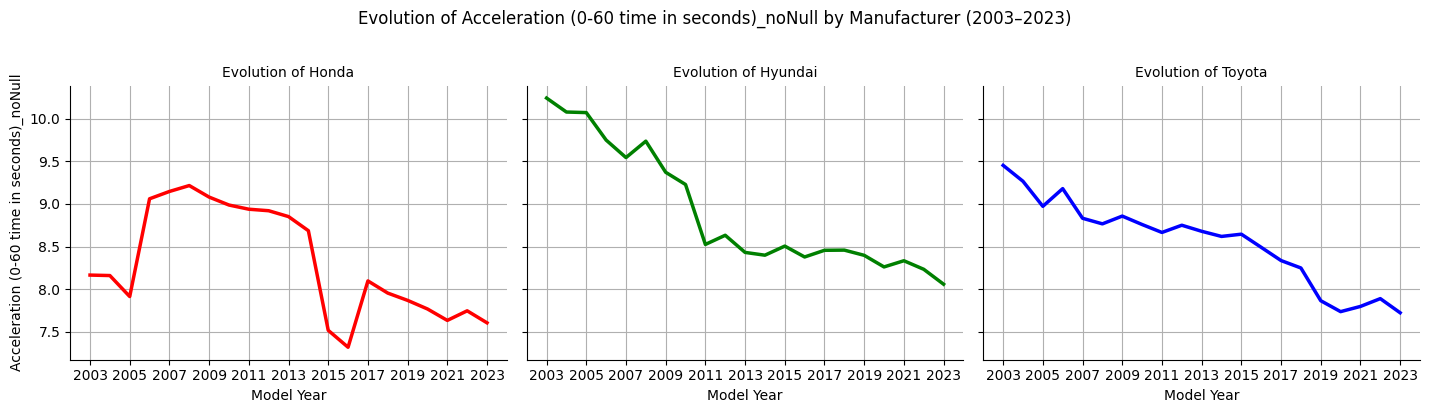

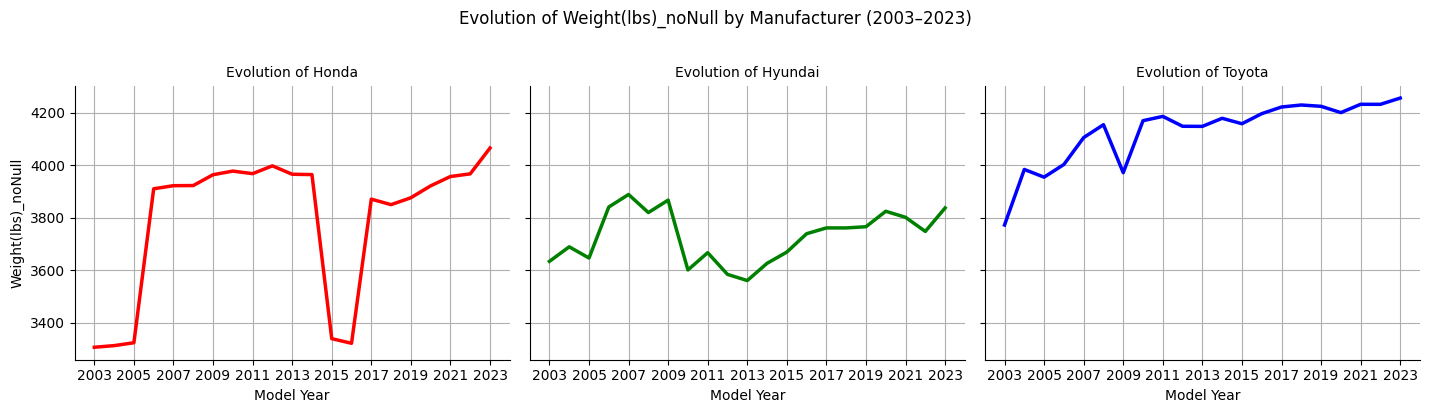

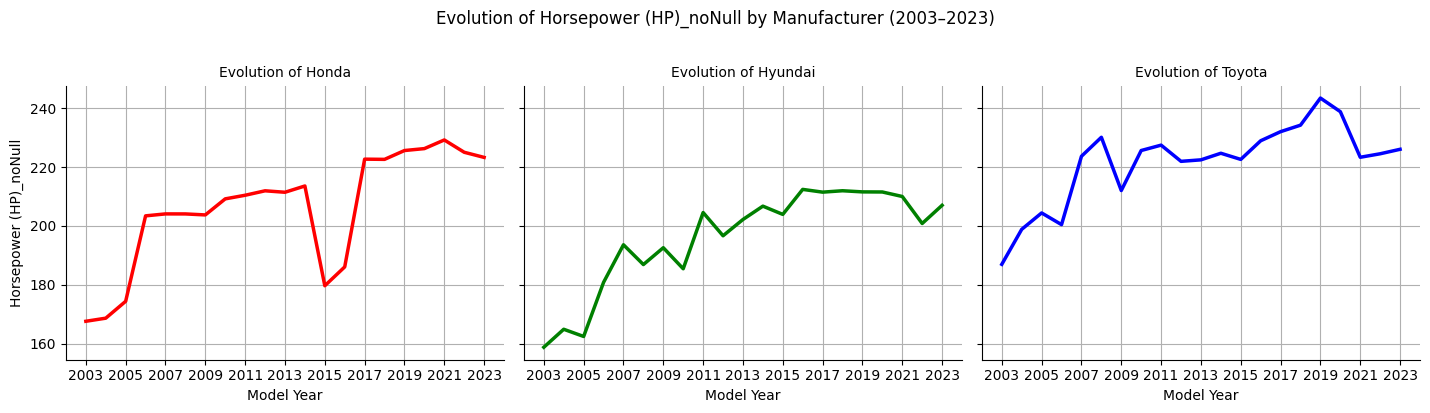

In [ ]:
for metric in metrics:
    # Filtered data (already done above, but reuse inside loop if needed)
    sub = filtered_highlight_data.copy()

    # Create FacetGrid for this metric
    g = sns.FacetGrid(
        sub,
        col="Manufacturer", col_wrap=3,
        height=4, aspect=1.2,
        palette=highlight_palette,
        hue="Manufacturer",
        hue_order=highlight_manufacturers
    )

    # Map lineplot for this metric
    g.map_dataframe(
        sns.lineplot,
        x='Model Year (Renew)',
        y=metric,
        linewidth=2.5
    )

    # Titles and labels
    g.set_titles("Evolution of {col_name}")
    g.set_axis_labels("Model Year", metric)
    g.fig.suptitle(f'Evolution of {metric} by Manufacturer (2003–2023)', y=1.02)

    # X-axis ticks every 2 years
    years = np.sort(sub['Model Year (Renew)'].unique())
    tick_years = years[::2]
    g.set(xticks=tick_years)
    for ax in g.axes.flat:
        ax.set_xticklabels([str(int(y)) for y in tick_years])
        ax.grid(True)

    plt.tight_layout()
    plt.show()


### Chart 1 - Takeaway
Upward trend from 2003 to 2023 on  Horsepower (HP), Downward trend on acceleration (means vehicles manufactured are getting faster on average), Weight has both ups and downs but trend continues to slowly rise up.

### Chart 1 - Design Decision
Simple but elegant to provide necessary information on our situation, the trend line we can easily perceive going up after 20 years starting from the year 2003. Separating the three manufacturers instead of one single-combined line chart is also a wiser decision to have a clear view of the trend.
                                                                            


Benefit of line charts here is the ease to monitor or track the behaviour of data points (specifically time-driven data)  that makes communication clear and simple without creating confusion to the authors to the readers.

### Chart 1 - Additional Insights
Limitations :
Since we see line charts frequently, the specific type of chart may not be the best option to choose if you aim to engage and gauge the interaction between you and the target audience.


Sometimes, you have to be specific on time points to deliver the message more clearly. Here is the example if we include from the 1980s to 2023; --- See report document

The timeline is honestly too long to give sensible interpretation since the 1975 to admit is too far away from the present already, so we decide to narrow it down to only the recent 20 years from 2003 to 2023, on which we still perceive the similar message of trend lines going upward.


We decide to limit from all 12 manufacturers down to 3 for simpler visualization as well, and repeatedly too dense of information is a visual clutter that will not gain the attention of any readers.

# Bump Chart - Checking Ranks of Manufacturers on Acceleration, Weight(lbs), and Horsepower
Generate a bump chart showing the evolution of rankings for Acceleration, Weight, and Horsepower (non-normalized) for Honda, Hyundai, and Toyota from 2003 to 2023 using the dataset at "/content/drive/MyDrive/DS distrib/Output - TresSigmas - Cleaned.csv".

## Calculate rankings

### Subtask:
For each metric (Acceleration, Weight, Horsepower) and each year (2003-2023), calculate the rank of each manufacturer (Honda, Hyundai, Toyota). Lower rank is better (e.g., lower acceleration time is better).


**Reasoning**:
Calculate the rank for each metric for the specified manufacturers and years, considering whether a lower or higher value indicates a better rank.



In [ ]:
# Define the metrics to calculate ranks for
metrics = ['Acceleration (0-60 time in seconds)_noNull', 'Weight(lbs)_noNull', 'Horsepower (HP)_noNull']

# Filter the manufacturer_evolution DataFrame for the years between 2003 and 2023
filtered_years_data = manufacturer_evolution[(manufacturer_evolution['Model Year (Renew)'] >= 2003) & (manufacturer_evolution['Model Year (Renew)'] <= 2023)]

# Calculate the rank for each metric within each year for all manufacturers
# Removed the filtering for specific manufacturers here
ranked_data = filtered_years_data.copy()

for metric in metrics:
    rank_col_name = metric.replace(' (0-60 time in seconds)', '').replace('(lbs)', '').replace(' (HP)', '').replace('_noNull', '').strip() + '_Rank'
    if 'Acceleration' in metric or 'Weight' in metric:
        # Lower is better for Acceleration and Weight
        ranked_data[rank_col_name] = ranked_data.groupby('Model Year (Renew)')[metric].rank(method='min', ascending=True)
    elif 'Horsepower' in metric:
        # Higher is better for Horsepower
        ranked_data[rank_col_name] = ranked_data.groupby('Model Year (Renew)')[metric].rank(method='min', ascending=False)

display(ranked_data.head())

Manufacturer  Model Year (Renew)  \
28          All                2003   
29          All                2004   
30          All                2005   
31          All                2006   
32          All                2007   

    Acceleration (0-60 time in seconds)_noNull  Weight(lbs)_noNull  \
28                                    9.400925         4126.564375   
29                                    9.151225         4235.349000   
30                                    9.081000         4225.540750   
31                                    9.078600         4244.587750   
32                                    8.991763         4297.364000   

    Horsepower (HP)_noNull  Acceleration_Rank  Weight_Rank  Horsepower_Rank  
28              201.762725               11.0         12.0              3.0  
29              214.552038               11.0         12.0              5.0  
30              215.075300               10.0         11.0              4.0  
31              217.374212                9.0         11.0              4.0  
32              225.638075               10.0         12.0              3.0

## Prepare data for bump chart

### Subtask:
Restructure the data to have years on the x-axis, ranks on the y-axis, and separate lines for each manufacturer, colored according to the highlighted manufacturers.


**Reasoning**:
Restructure the data by melting the DataFrame to prepare it for plotting the rankings, mapping the column names for better readability, and ensuring the year column is an integer.



## Create bump chart

### Subtask:
Generate line plots using the ranking data, emphasizing the rank changes and crossovers.


**Reasoning**:
Generate line plots for each metric using the melted rank data, highlighting the specified manufacturers and reversing the y-axis to show lower ranks at the top.



In [ ]:
# Melt the ranked_data DataFrame to long format
melted_ranks_all = ranked_data.melt(
    id_vars=['Manufacturer', 'Model Year (Renew)'],
    value_vars=['Acceleration_Rank', 'Weight_Rank', 'Horsepower_Rank'],
    var_name='Metric',
    value_name='Rank'
)

# Create a dictionary to map column names to more descriptive metric names
metric_names_map = {
    'Acceleration_Rank': 'Acceleration Ranking',
    'Weight_Rank': 'Weight Ranking',
    'Horsepower_Rank': 'Horsepower Ranking'
}

# Replace the melted 'Metric' column values with descriptive names
melted_ranks_all['Metric'] = melted_ranks_all['Metric'].replace(metric_names_map)

# Ensure the 'Model Year (Renew)' column is an integer
melted_ranks_all['Model Year (Renew)'] = melted_ranks_all['Model Year (Renew)'].astype(int)

display(melted_ranks_all.head())

Manufacturer  Model Year (Renew)                Metric  Rank
0          All                2003  Acceleration Ranking  11.0
1          All                2004  Acceleration Ranking  11.0
2          All                2005  Acceleration Ranking  10.0
3          All                2006  Acceleration Ranking   9.0
4          All                2007  Acceleration Ranking  10.0

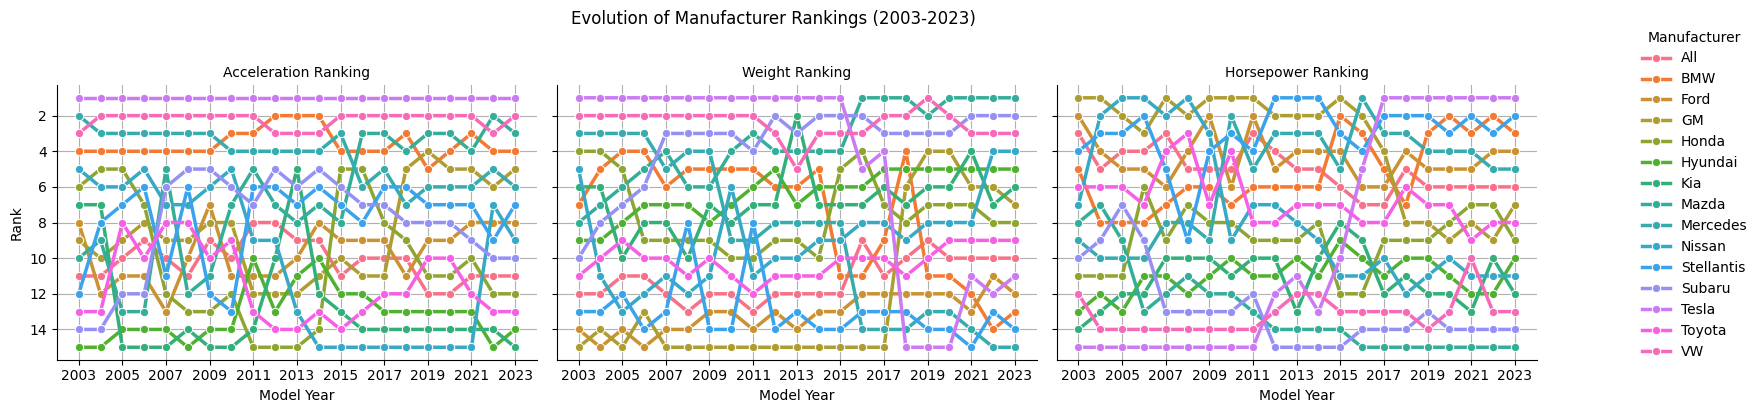

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid for each metric
g = sns.FacetGrid(melted_ranks_all, col="Metric", col_wrap=3, height=4, aspect=1.2)

# Map a line plot onto the FacetGrid, passing the data explicitly with markers
g.map_dataframe(sns.lineplot, x='Model Year (Renew)', y='Rank', hue='Manufacturer', linewidth=2.5, marker='o') # Added marker='o'

# Reverse the y-axis so rank 1 is at the top
for ax in g.axes.flat:
    ax.invert_yaxis()
    ax.grid(True) # Add grid to each subplot

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Model Year", "Rank")
g.fig.suptitle('Evolution of Manufacturer Rankings (2003-2023)', y=1.02) # Add a title to the figure

# Set the x-axis ticks to be the selected years every 2 years
years = melted_ranks_all['Model Year (Renew)'].unique()
tick_years = years[::2]
g.set(xticks=tick_years)
for ax in g.axes.flat:
    ax.set_xticklabels([str(int(year)) for year in tick_years])

# Add legend
g.add_legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

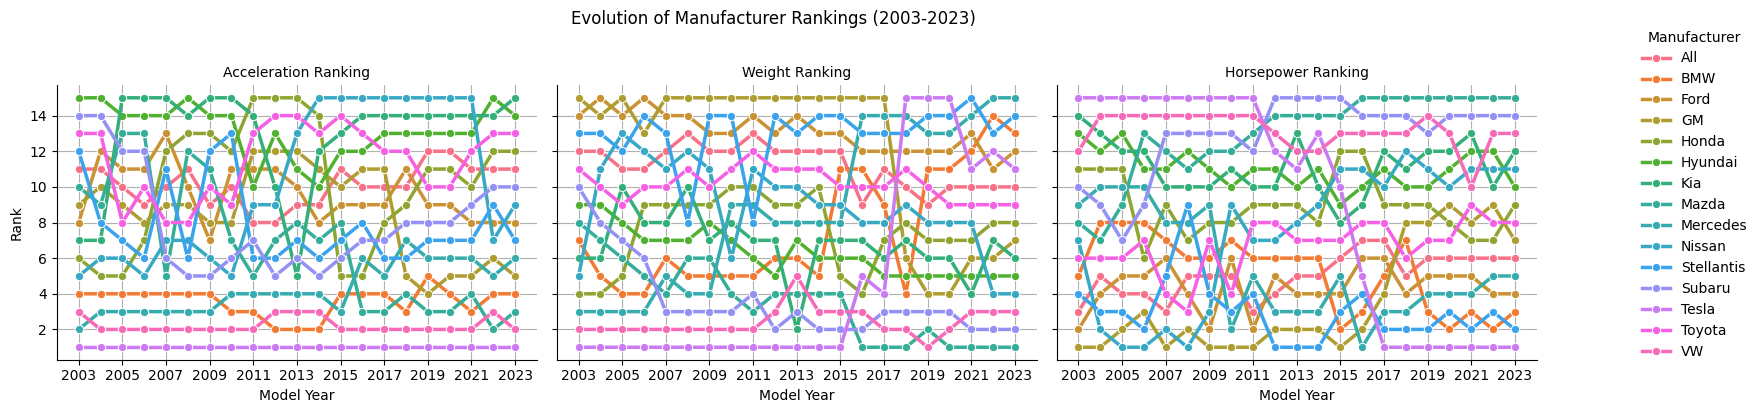

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid for each metric
g = sns.FacetGrid(melted_ranks_all, col="Metric", col_wrap=3, height=4, aspect=1.2)

# Map a line plot onto the FacetGrid, passing the data explicitly with markers
g.map_dataframe(sns.lineplot, x='Model Year (Renew)', y='Rank', hue='Manufacturer', linewidth=2.5, marker='o') # Added marker='o'

# Reverse the y-axis so rank 1 is at the top
for ax in g.axes.flat:
    # ax.invert_yaxis() # Removed y-axis inversion
    ax.grid(True) # Add grid to each subplot

    # Add rank number as text annotation for each data point
    for line in ax.get_lines():
        # Get the data from the line
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        # Get the color of the line to match text color
        color = line.get_color()
        # Get the manufacturer for this line (assuming hue is Manufacturer)
        manufacturer = line.get_label()

        # Filter the melted_ranks_all data for the current manufacturer and metric
        # Find the metric for the current subplot by looking at the column name in the FacetGrid axes
        # This is a more reliable way to get the metric name in FacetGrid
        metric_name = ax.get_title().replace('Evolution of ', '') # Adjust if title format changes

        # Find the corresponding data points in the melted_ranks_all DataFrame
        plot_data = melted_ranks_all[(melted_ranks_all['Manufacturer'] == manufacturer) & (melted_ranks_all['Metric'] == metric_name)]


        # Add text annotation for each point
        for i, (x, y) in enumerate(zip(x_data, y_data)):
            # Find the original rank value from the DataFrame based on year
            original_rank = plot_data[plot_data['Model Year (Renew)'] == x]['Rank'].iloc[0] if x in plot_data['Model Year (Renew)'].values else None
            if original_rank is not None:
                 ax.text(x, y, f'{int(original_rank)}', color='black', ha='center', va='bottom' if i % 2 == 0 else 'top', fontsize=8, weight='bold') # Changed text color to black for visibility, added bold


# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Model Year", "Rank")
g.fig.suptitle('Evolution of Manufacturer Rankings (2003-2023)', y=1.02) # Add a title to the figure

# Set the x-axis ticks to be the selected years every 2 years
years = melted_ranks_all['Model Year (Renew)'].unique()
tick_years = years[::2]
g.set(xticks=tick_years)
for ax in g.axes.flat:
    ax.set_xticklabels([str(int(year)) for year in tick_years])

# Add legend
g.add_legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## CHART 2 - BUMP CHART
Rank of Acceleration, Weight, and Horsepower (HP) of Ford, GM, Honda, Toyota, and VW over the years from 2003 to 2023

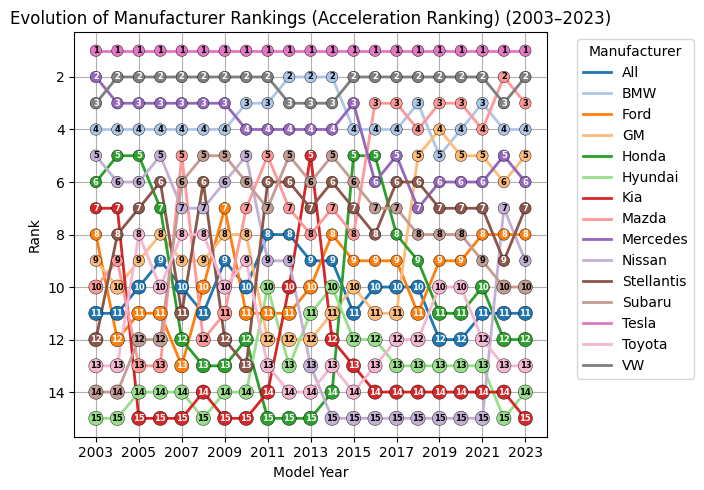

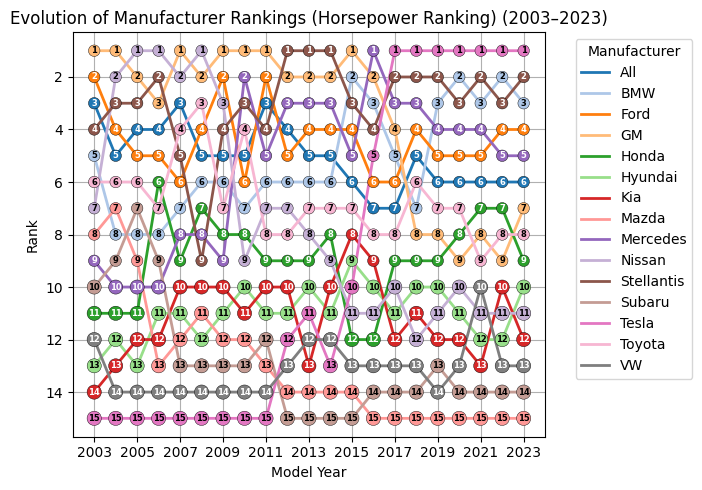

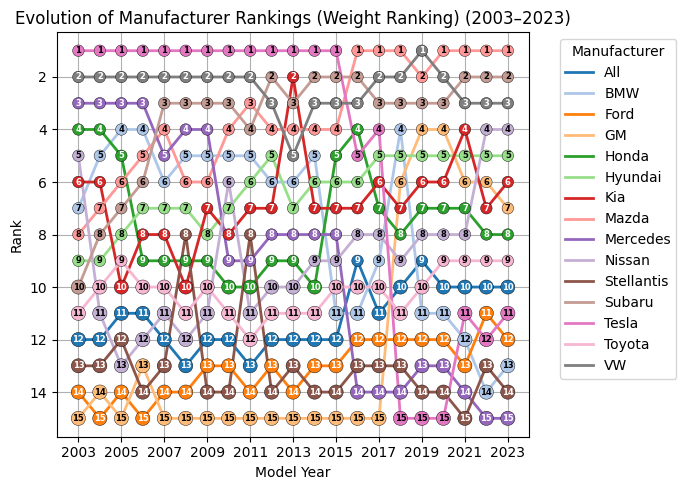

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Unique manufacturer order
manufacturers = list(melted_ranks_all['Manufacturer'].unique())

# Palette (tab20 or husl if more manufacturers)
palette_list = sns.color_palette("tab20", n_colors=len(manufacturers))
manufacturer_colors = dict(zip(manufacturers, palette_list))

# Helper to pick readable text color
def readable_text_color(rgb):
    r, g, b = rgb
    lum = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if lum > 0.6 else 'white'

# Iterate over metrics and create separate figures
for metric, sub in melted_ranks_all.groupby("Metric"):
    plt.figure(figsize=(7, 5))

    # Lineplot with consistent palette
    sns.lineplot(
        data=sub,
        x='Model Year (Renew)',
        y='Rank',
        hue='Manufacturer',
        palette=manufacturer_colors,
        hue_order=manufacturers,
        linewidth=2.0
    )

    # Invert y and add grid
    plt.gca().invert_yaxis() # Removed y-axis inversion
    plt.grid(True)

    # Add rank circles
    for _, row in sub.iterrows():
        col = manufacturer_colors[row['Manufacturer']]
        txtcol = readable_text_color(col)
        plt.text(
            row['Model Year (Renew)'], row['Rank'], str(int(row['Rank'])),
            ha='center', va='center',
            fontsize=6, fontweight='bold',
            color=txtcol,
            bbox=dict(
                boxstyle="circle,pad=0.15",
                fc=col, ec="black", lw=0.3
            )
        )

    # Axis labels and title
    plt.xlabel("Model Year")
    plt.ylabel("Rank")
    plt.title(f"Evolution of Manufacturer Rankings ({metric}) (2003–2023)")

    # X-axis ticks every 2 years
    years = np.sort(sub['Model Year (Renew)'].unique())
    tick_years = years[::2]
    plt.xticks(tick_years, [str(int(y)) for y in tick_years])

    # Legend
    plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

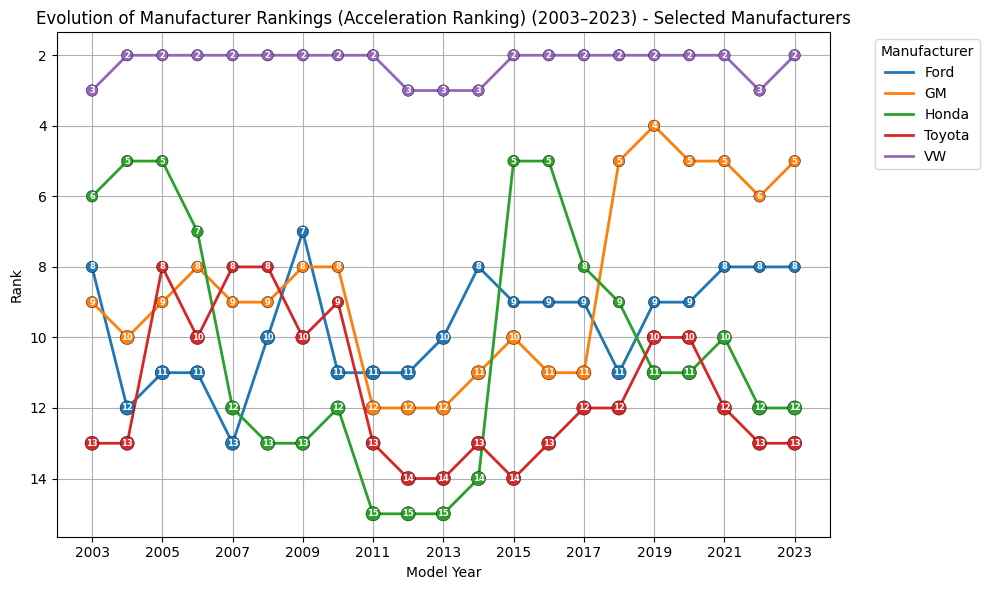

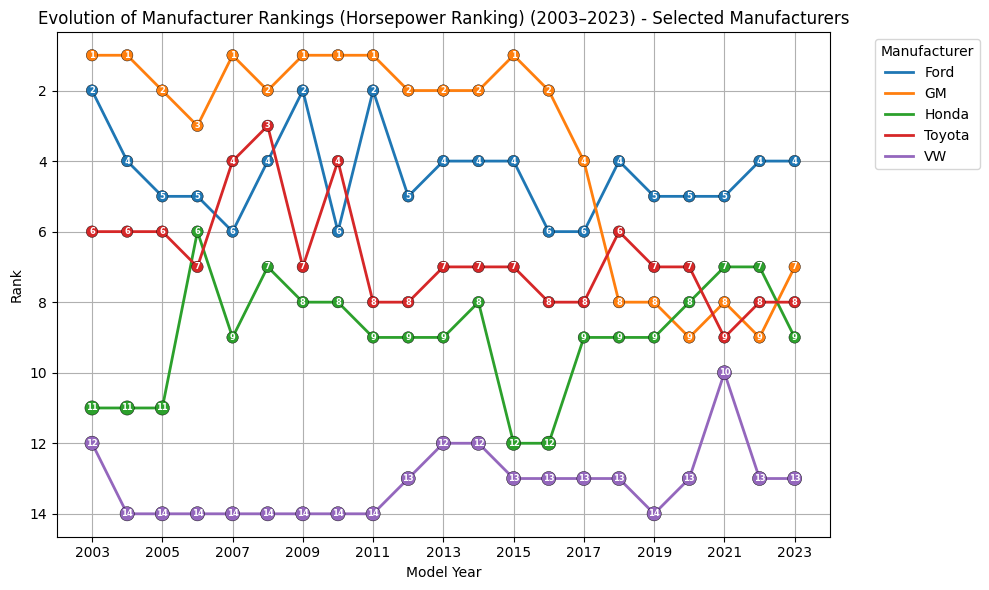

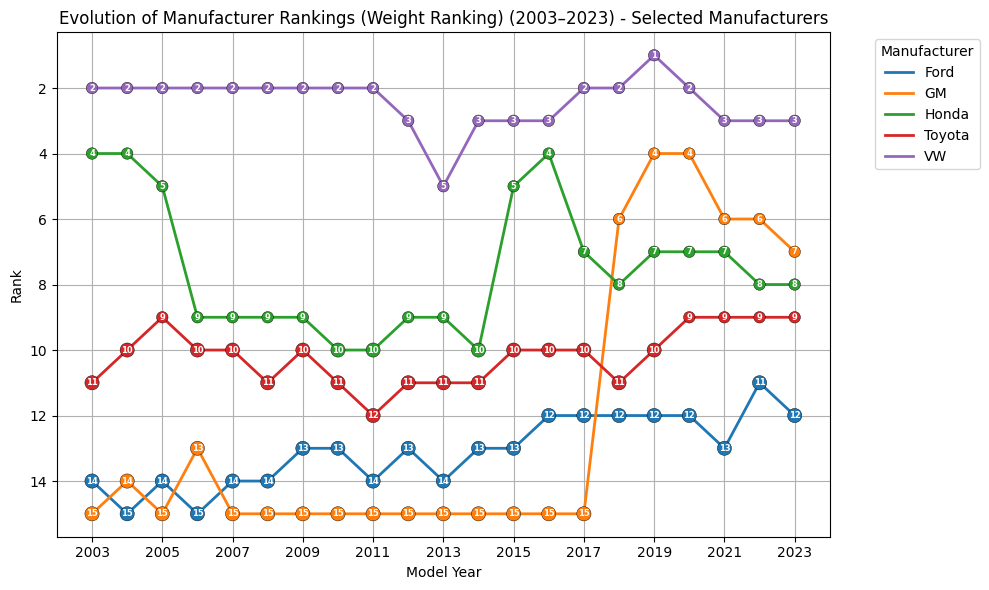

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a list of important manufacturers to focus on
important_manufacturers = ['Ford', 'GM', 'Honda', 'Toyota', 'VW'] # Example list of 5 important manufacturers

# Filter the melted_ranks_all DataFrame to include only the important manufacturers
filtered_melted_ranks = melted_ranks_all[melted_ranks_all['Manufacturer'].isin(important_manufacturers)].copy()


# Unique manufacturer order for the filtered data
manufacturers = list(filtered_melted_ranks['Manufacturer'].unique())

# Palette (tab20 or husl if more manufacturers)
palette_list = sns.color_palette("tab10", n_colors=len(manufacturers)) # Using tab10 for potentially fewer colors needed
manufacturer_colors = dict(zip(manufacturers, palette_list))

# Helper to pick readable text color
def readable_text_color(rgb):
    r, g, b = rgb
    lum = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if lum > 0.6 else 'white'

# Iterate over metrics and create separate figures
for metric, sub in filtered_melted_ranks.groupby("Metric"):
    plt.figure(figsize=(10, 6)) # Adjusted figure size


    # Lineplot with consistent palette
    sns.lineplot(
        data=sub,
        x='Model Year (Renew)',
        y='Rank',
        hue='Manufacturer',
        palette=manufacturer_colors,
        hue_order=manufacturers,
        linewidth=2.0
    )

    # Invert y and add grid
    plt.gca().invert_yaxis() # Removed y-axis inversion
    plt.grid(True)

    # Add rank circles
    for _, row in sub.iterrows():
        col = manufacturer_colors[row['Manufacturer']]
        txtcol = readable_text_color(col)
        plt.text(
            row['Model Year (Renew)'], row['Rank'], str(int(row['Rank'])),
            ha='center', va='center',
            fontsize=6, fontweight='bold',
            color=txtcol,
            bbox=dict(
                boxstyle="circle,pad=0.15",
                fc=col, ec="black", lw=0.3
            )
        )

    # Axis labels and title
    plt.xlabel("Model Year")
    plt.ylabel("Rank")
    plt.title(f"Evolution of Manufacturer Rankings ({metric}) (2003–2023) - Selected Manufacturers") # Updated title

    # X-axis ticks every 2 years
    years = np.sort(sub['Model Year (Renew)'].unique())
    tick_years = years[::2]
    plt.xticks(tick_years, [str(int(y)) for y in tick_years])

    # Legend
    plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

## Chart 2 - Takeaway
For the selected manufacturers (Ford, GM, Honda, Toyota, and VW), the rankings in Acceleration, Horsepower, and Weight have fluctuated over the years from 2003 to 2023, with no single manufacturer consistently holding the top rank across all three metrics.

## Chart 2 - Design Decision
A key design decision that made the chart easier to interpret was adding the rank number as text annotation within each circle on the plot. This allowed for quick identification of a manufacturer's exact rank in a given year without needing to refer to the y-axis grid lines.

## Chart 2 - Additional Insights
Limitations : Since Bump Chart focuses on the relative ranks rather than the actual values, bump charts could not determine how dominant or different one manufacturer is compared to the one that is beneath or above their ranks. Additionally, there is difficulty in interpretation of these visuals including all manufacturers, too much visual clutter unless we removed some on the chart to focus on.

Others : VW (Volkswagen) consistently maintained a high rank (low number) in Weight, suggesting their vehicles were generally lighter compared to the other selected manufacturers.
Honda and Toyota showed more variability in their rankings across the three metrics compared to Ford and GM, indicating shifts in their performance benchmarks over time.
There are several instances of rank crossovers, particularly in Acceleration and Horsepower, highlighting the competitive nature of these performance metrics among manufacturers.


# **QUESTION 2** - How are CO2 emissions and fuel efficiency distributed across different vehicle types? (Distribution chart focused)

## Table Exploration - Q3

In [ ]:
# Table for CO2 Emissions and Fuel Efficiency Distribution: Calculate average emissions and fuel efficiency by vehicle type (using non-scaled metrics)
vehicle_type_emissions_fuel = csv_gdrive.groupby('Vehicle Type')[['Real-World CO2 (g/mi)_noNull', 'Real-World CO2_City (g/mi)_noNull', 'Real-World CO2_Hwy (g/mi)_noNull', 'Real-World MPG_noNull', 'Real-World MPG_City_noNull', 'Real-World MPG_Hwy_noNull']].mean().reset_index()
display(vehicle_type_emissions_fuel)

Vehicle Type  Real-World CO2 (g/mi)_noNull  \
0          All                    357.591966   
1      All Car                    331.481417   
2    All Truck                    354.399679   
3      Car SUV                    231.136958   
4  Minivan/Van                    327.094558   
5       Pickup                    363.384796   
6  Sedan/Wagon                    329.581122   
7    Truck SUV                    323.832486   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                         408.167125                        312.734529   
1                         380.720543                        287.584234   
2                         401.282454                        314.385661   
3                         263.077089                        204.096028   
4                         371.951206                        288.247710   
5                         409.250670                        322.970470   
6                         379.530035                        285.150049   
7                         367.089265                        287.428140   

   Real-World MPG_noNull  Real-World MPG_City_noNull  \
0              22.295072                   19.817774   
1              23.971527                   21.150602   
2              15.945503                   14.226566   
3              13.963410                   12.460486   
4              13.166047                   11.535735   
5              13.554861                   12.074427   
6              24.194861                   21.292432   
7              13.789362                   12.255709   

   Real-World MPG_Hwy_noNull  
0                  25.173457  
1                  27.284676  
2                  17.836683  
3                  15.570998  
4                  15.010979  
5                  15.246203  
6                  27.620395  
7                  15.424749

## BEESWARM PLOT - Chart 3.0

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.6% of the points cannot be placed

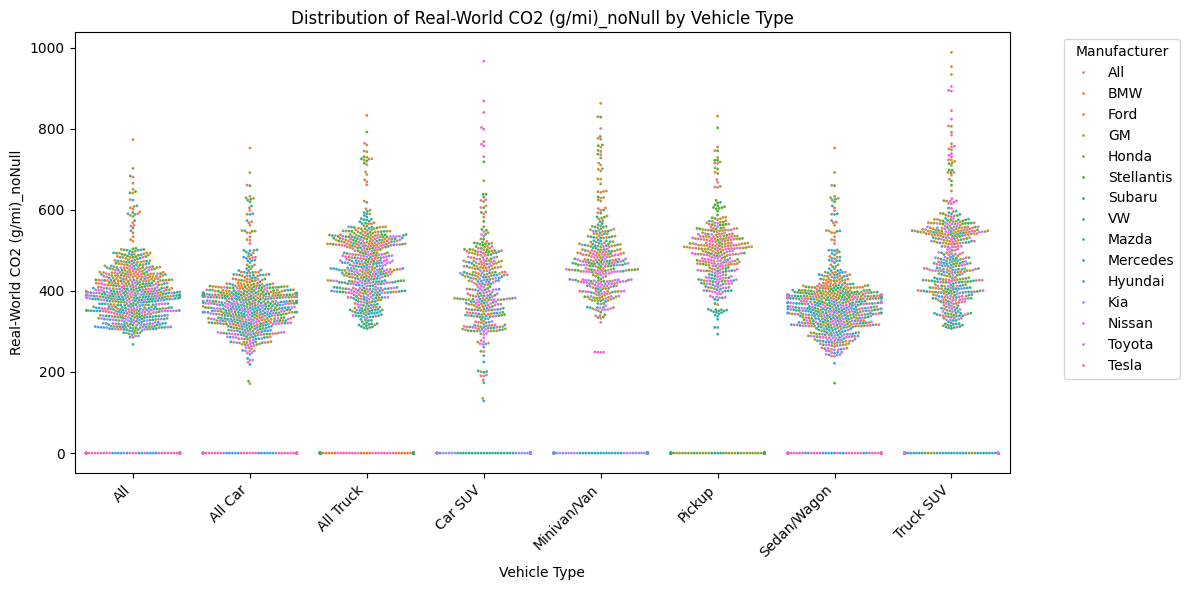

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.6% of the points cannot be placed

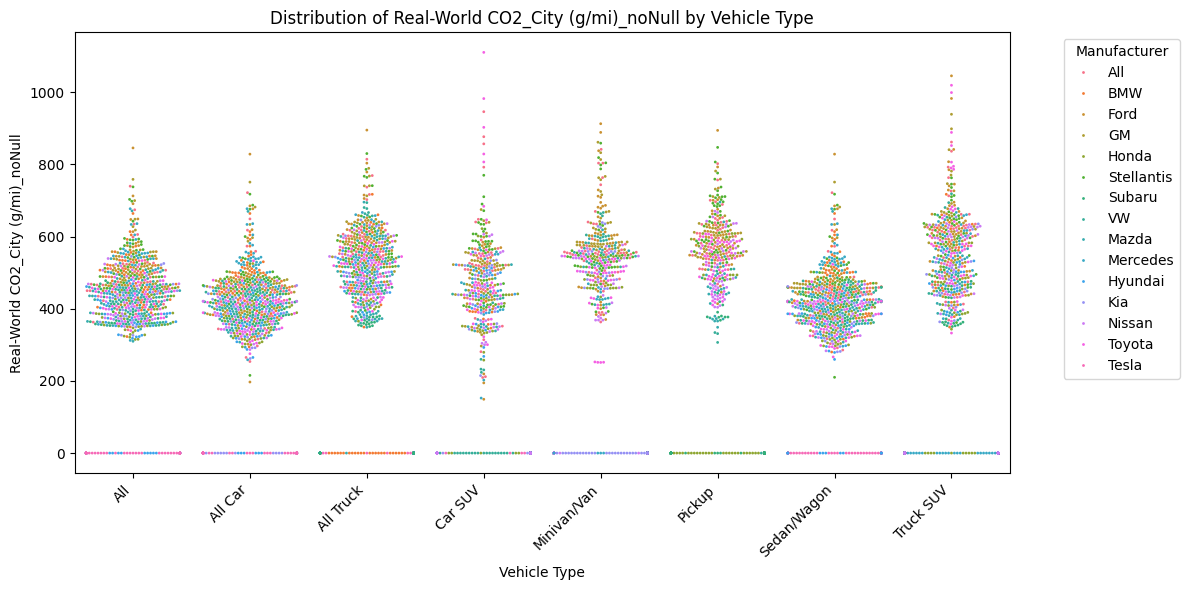

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.6% of the points cannot be place

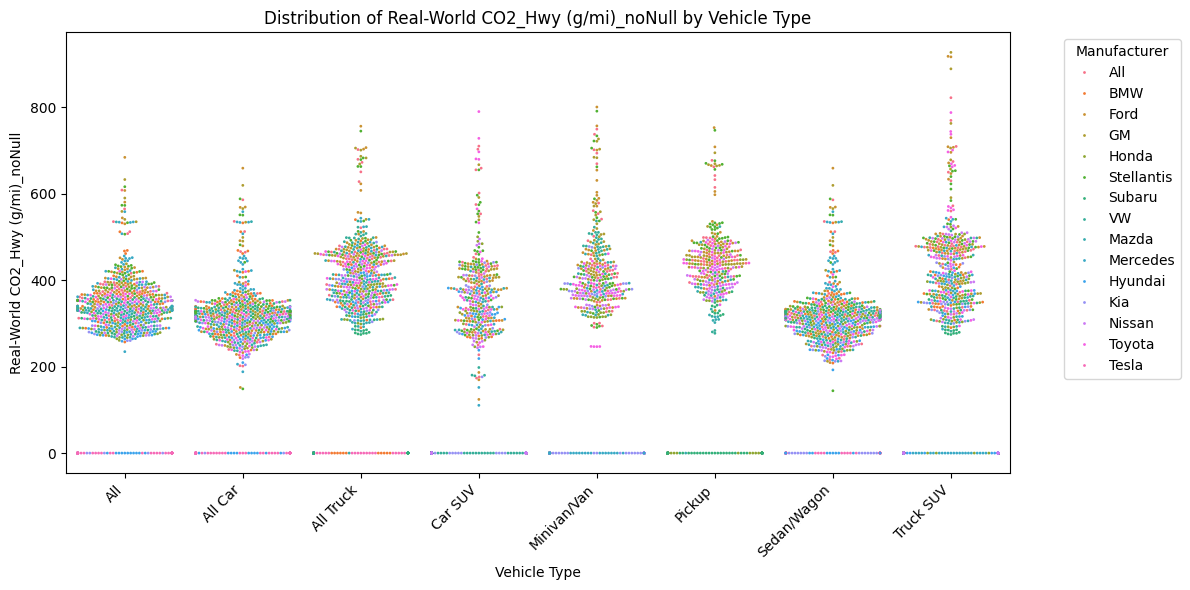

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the CO2 metrics to plot
co2_metrics = ['Real-World CO2 (g/mi)_noNull','Real-World CO2_City (g/mi)_noNull', 'Real-World CO2_Hwy (g/mi)_noNull']

# Create beeswarm plots for each CO2 metric
for metric in co2_metrics:
    plt.figure(figsize=(12, 6))
    sns.swarmplot(data=csv_gdrive, x='Vehicle Type', y=metric, hue='Manufacturer', size=2) # Decreased marker size
    plt.title(f'Distribution of {metric} by Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend
    plt.tight_layout()
    plt.show()

## STRIP PLOT - Chart 3.1

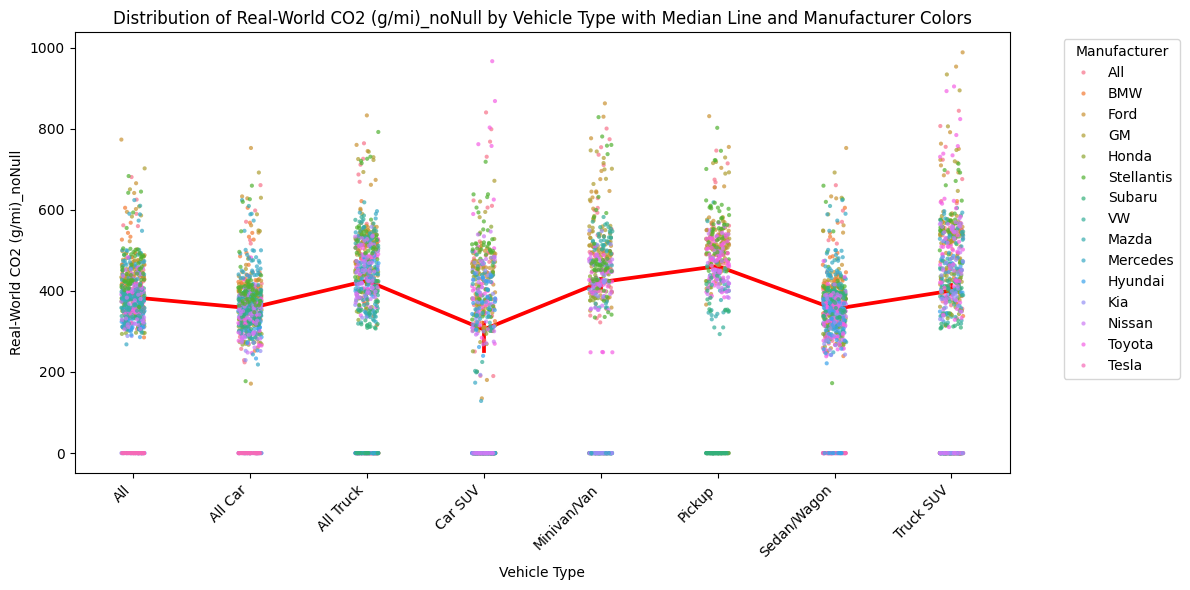

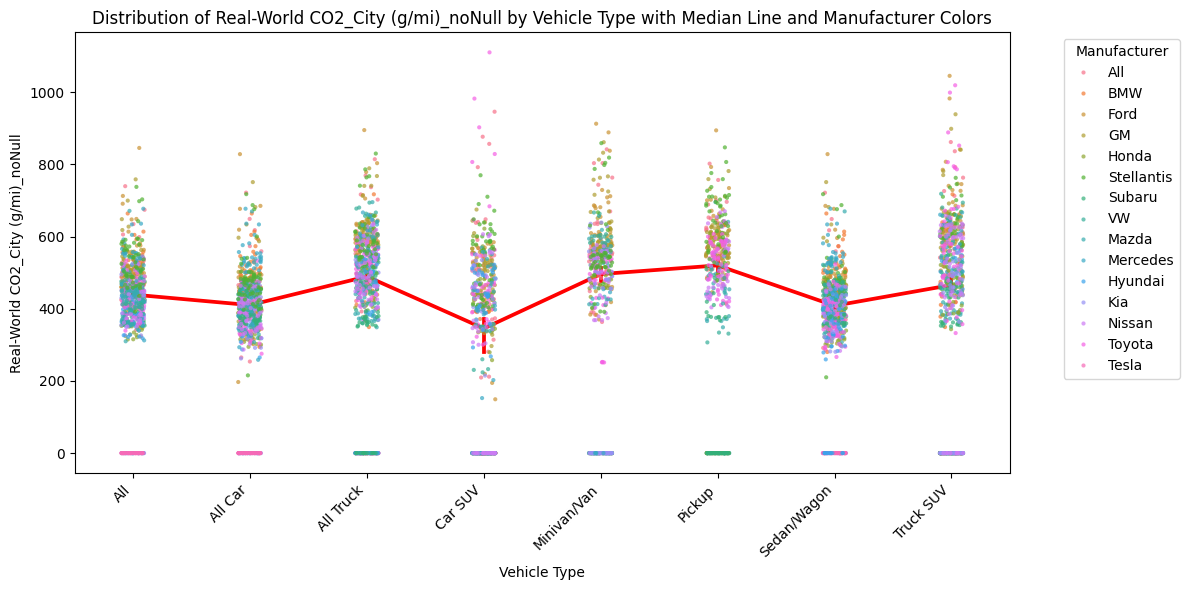

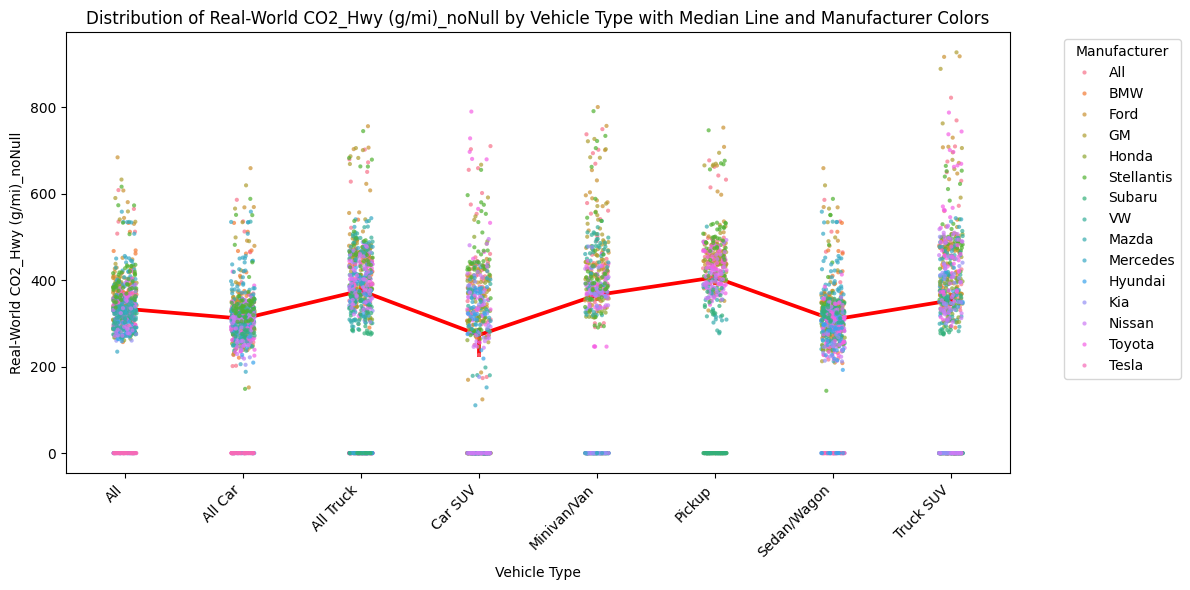

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stripplot to show the distribution of Real-World CO2 (g/mi) by Vehicle Type, colored by Manufacturer
plt.figure(figsize=(12, 6))
sns.stripplot(data=csv_gdrive, x='Vehicle Type', y='Real-World CO2 (g/mi)_noNull', hue='Manufacturer', jitter=True, size=3, alpha=0.7) # Use stripplot with hue for manufacturer color

# Add a pointplot to show the median line
sns.pointplot(data=csv_gdrive, x='Vehicle Type', y='Real-World CO2 (g/mi)_noNull', estimator='median', color='red', linestyles='-', markers='') # Use pointplot for median line

plt.title('Distribution of Real-World CO2 Emissions by Vehicle Type with Median Line and Manufacturer Colors')
plt.xlabel('Vehicle Type')
plt.ylabel('Real-World CO2 (g/mi)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend
plt.tight_layout()
plt.show()

## Chart 3 - Takeaway
The graph illustrates the distribution of real-world CO2 emissions by vehicle type, offering a comprehensive comparison across manufacturers such as BMW, Ford, and Tesla, and highlighting the varying environmental impacts associated with different vehicle categories.


## Chart 3 - Design Decision
The design features a scatter plot that illustrates how CO2 emissions are distributed among different vehicle types. This visual representation method is beneficial because it helps us to easily compare emissions across various manufacturers and car models. It also effectively highlights trends and any outliers in emission levels. It enables a visual comparison that makes it easy to see which types of cars are greener and which aren't.

## Chart 3 - Additional Insights
Limitation : Not all points on the categories were all placed on the Beeswarm plot (not enough space to place these data points that occurred on all columns). Another specific limitation is that it doesn’t show how many cars each manufacturer produces. So, a company with higher emissions might just be making more cars, not necessarily less eco-friendly ones.

View first the report document --- As you can see in the following figure of log, it indicates that a significant percentage of points in the beeswarm plot could not be placed, possibly leading to overlapping or unclear visualization. It suggests that we should reduce the marker size or use a different plot type like a strip plot, which will be expounded upon after this, for better clarity.

View first the report document --- The strip plots in the figure above take data points and align them along a single axis, which helps in reducing the overlapping of points. This makes it easier to see each individual point, unlike the beeswarm plot, which can get a bit crowded. Also, this plot is more structured and informative by adding a median line and uses different colors for each manufacturer. Each plot shows CO2 emissions in broad conditions, city conditions, and highway conditions. This plot eliminates the error found in the beeswarm plot because it uses a strip plot visualization method that can handle overlapping data points more effectively. It also avoids the issues with points that can’t be placed due to crowding, resulting in a cleaner and more readable plot.

## Table Exploration - Q4 for Fuel Efficiency or MPG

In [ ]:
# Table for CO2 Emissions and Fuel Economy over Model Years by Manufacturer and Vehicle Type: Calculate average emissions and fuel economy by model year, manufacturer, and vehicle type
emissions_fuel_by_year_manufacturer_vehicle = csv_gdrive.groupby(['Manufacturer', 'Model Year (Renew)', 'Vehicle Type'])[['Real-World MPG_noNull', 'Real-World MPG_City_noNull', 'Real-World MPG_Hwy_noNull']].mean().reset_index()
display(emissions_fuel_by_year_manufacturer_vehicle.head())

Manufacturer  Model Year (Renew) Vehicle Type  Real-World MPG_noNull  \
0          All                1975          All               13.05970   
1          All                1975      All Car               13.45483   
2          All                1975    All Truck               11.63431   
3          All                1975      Car SUV               11.12929   
4          All                1975  Minivan/Van               11.10606   

   Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  
0                    12.01552                   14.61167  
1                    12.31413                   15.17266  
2                    10.91165                   12.65900  
3                    10.13552                   12.64456  
4                    10.55642                   11.86084

## VIOLIN PLOT - Chart 4
Violin Plot of Real-World Distribution of MPG by Vehicle Type

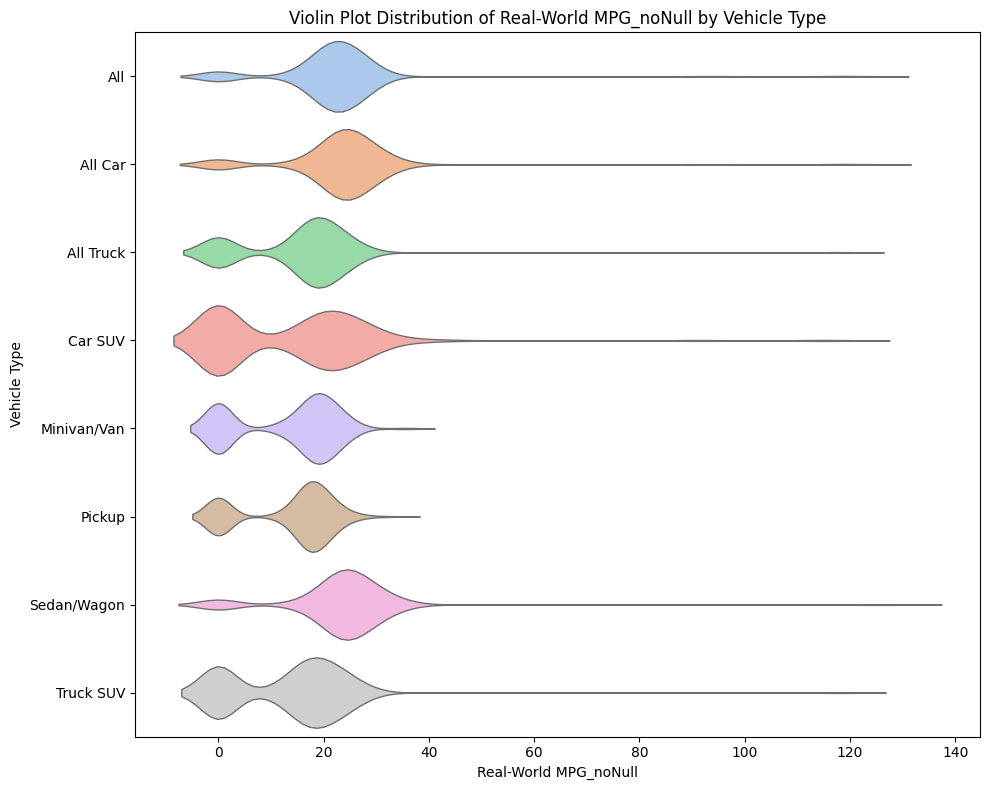

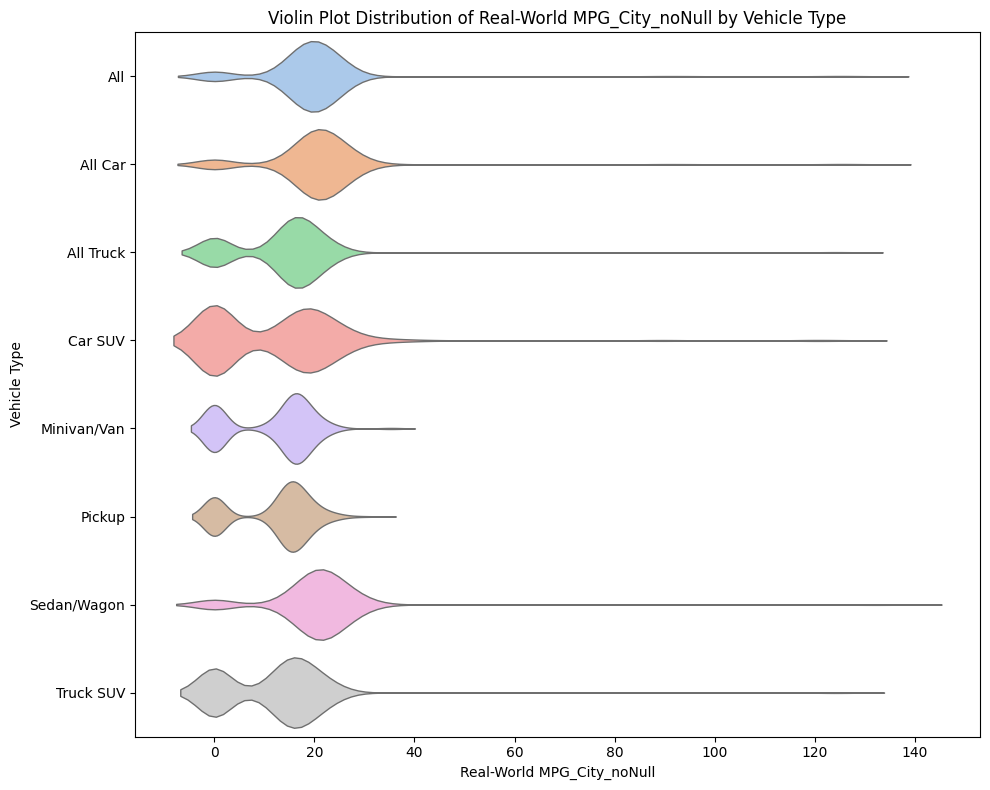

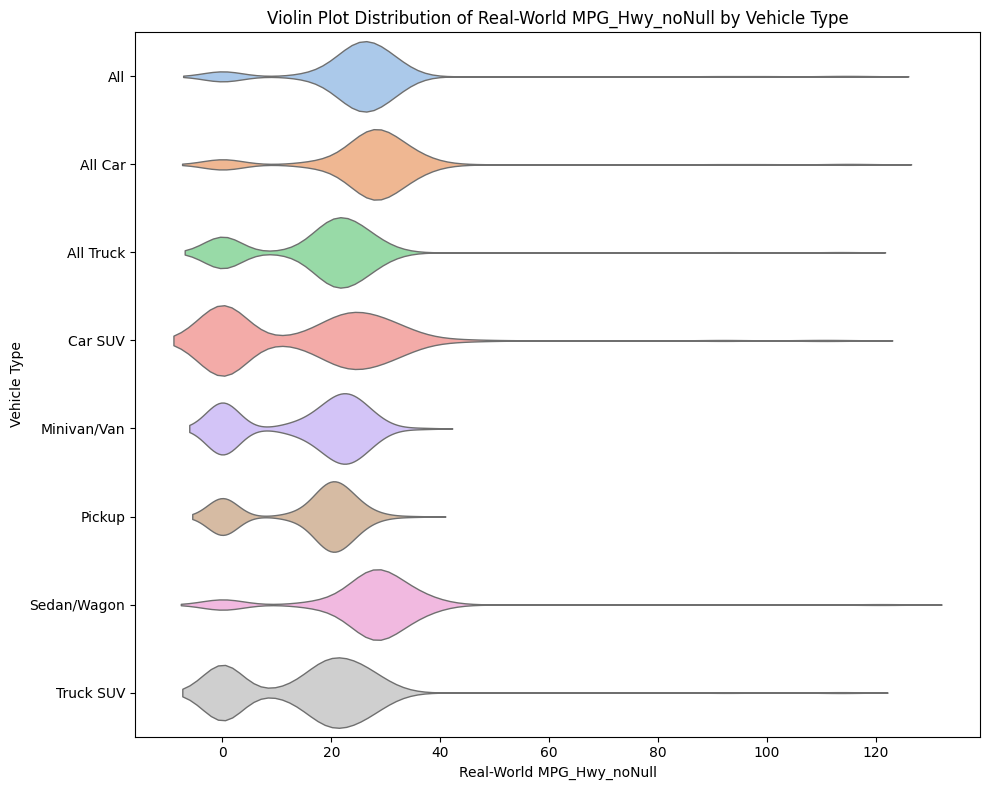

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the MPG metrics to plot
mpg_metrics = ['Real-World MPG_noNull','Real-World MPG_City_noNull', 'Real-World MPG_Hwy_noNull']

# Create violin plots for each MPG metric
for metric in mpg_metrics:
    plt.figure(figsize=(10, 8)) # Adjusted figure size for horizontal orientation

    # Create a violin plot for the distribution by Vehicle Type
    # Address FutureWarning by explicitly setting hue and legend
    sns.violinplot(data=csv_gdrive, y='Vehicle Type', x=metric, inner=None, split=False, linewidth=1, palette='pastel', hue='Vehicle Type', legend=False)


    plt.title(f'Violin Plot Distribution of {metric} by Vehicle Type')
    plt.xlabel(metric) # Swapped labels
    plt.ylabel('Vehicle Type') # Swapped labels
    # No need for x-axis label rotation now
    plt.tight_layout()
    plt.show()

## Chart 4 - Takeaway
The violin plot in Figure 4.0 depicts that real-world MPG varies by vehicle type, with cars generally exhibiting higher fuel efficiency, while trucks and SUVs tend to have lower MPG, both in city and highway driving conditions.

## Chart 4 - Design Decision
Visually speaking, using different colors for each vehicle type makes it super easy to differentiate between categories at a glance, making data more accessible and the plot more visually engaging. The consistency in the scale of the plots also allows for easy comparison among the three plots.


## Chart 4 - Additional Insights
Limitation: A limitation in these violin plots could be the overlap of different vehicle types. In the violin plots shown above, there is little to no overlapping though. In instances where it occurs, overlapping can make it quite difficult to distinguish between them when the distributions are similar. This could lead to some challenges in accurately interpreting the data. The overlapping in this plot involves the distributions blending together if they are close in value.

# **QUESTION 3** - How have CO2 emissions per mile and fuel economy changed across model years?


## Table Explortation - Q5

In [ ]:
# Calculate average emissions and fuel efficiency by Vehicle Type and Manufacturer
vehicle_type_emissions_fuel = csv_gdrive.groupby(['Vehicle Type', 'Manufacturer'])[['Real-World CO2 (g/mi)_noNull', 'Real-World CO2_City (g/mi)_noNull', 'Real-World CO2_Hwy (g/mi)_noNull', 'Real-World MPG_noNull', 'Real-World MPG_City_noNull', 'Real-World MPG_Hwy_noNull']].mean().reset_index()
display(vehicle_type_emissions_fuel)

Vehicle Type Manufacturer  Real-World CO2 (g/mi)_noNull  \
0            All          All                    426.745441   
1            All          BMW                    419.269105   
2            All         Ford                    462.533398   
3            All           GM                    450.622023   
4            All        Honda                    337.737308   
..           ...          ...                           ...   
105    Truck SUV   Stellantis                    530.685083   
106    Truck SUV       Subaru                    196.254196   
107    Truck SUV        Tesla                      0.000000   
108    Truck SUV       Toyota                    513.301316   
109    Truck SUV           VW                    197.599289   

     Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                           486.888677                        372.195487   
1                           486.287933                        358.459092   
2                           528.050690                        403.042177   
3                           519.637893                        388.281209   
4                           382.602623                        298.614933   
..                                 ...                               ...   
105                         594.898607                        473.277741   
106                         224.602028                        174.311140   
107                           0.000000                          0.000000   
108                         567.906295                        462.292077   
109                         231.422807                        171.960389   

     Real-World MPG_noNull  Real-World MPG_City_noNull  \
0                21.302117                   18.602989   
1                21.609752                   18.584048   
2                19.629846                   17.132378   
3                20.067351                   17.322151   
4                26.489278                   23.494526   
..                     ...                         ...   
105              17.180874                   15.219355   
106              13.390822                   11.708980   
107              15.043480                   15.622699   
108              17.781146                   16.004753   
109               8.991762                    7.707870   

     Real-World MPG_Hwy_noNull  
0                    24.459016  
1                    25.275820  
2                    22.568045  
3                    23.395940  
4                    29.904904  
..                         ...  
105                  19.360603  
106                  15.058008  
107                  14.645946  
108                  19.678915  
109                  10.292168  

[110 rows x 8 columns]

In [ ]:
# Calculate average emissions and fuel efficiency by Vehicle Type and Manufacturer
vehicle_type_emissions_fuel = csv_gdrive.groupby(['Vehicle Type', 'Manufacturer'])[['Real-World CO2 (g/mi)_noNull', 'Real-World CO2_City (g/mi)_noNull', 'Real-World CO2_Hwy (g/mi)_noNull', 'Real-World MPG_noNull', 'Real-World MPG_City_noNull', 'Real-World MPG_Hwy_noNull']].mean().reset_index()
display(vehicle_type_emissions_fuel)

Vehicle Type Manufacturer  Real-World CO2 (g/mi)_noNull  \
0            All          All                    426.745441   
1            All          BMW                    419.269105   
2            All         Ford                    462.533398   
3            All           GM                    450.622023   
4            All        Honda                    337.737308   
..           ...          ...                           ...   
105    Truck SUV   Stellantis                    530.685083   
106    Truck SUV       Subaru                    196.254196   
107    Truck SUV        Tesla                      0.000000   
108    Truck SUV       Toyota                    513.301316   
109    Truck SUV           VW                    197.599289   

     Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                           486.888677                        372.195487   
1                           486.287933                        358.459092   
2                           528.050690                        403.042177   
3                           519.637893                        388.281209   
4                           382.602623                        298.614933   
..                                 ...                               ...   
105                         594.898607                        473.277741   
106                         224.602028                        174.311140   
107                           0.000000                          0.000000   
108                         567.906295                        462.292077   
109                         231.422807                        171.960389   

     Real-World MPG_noNull  Real-World MPG_City_noNull  \
0                21.302117                   18.602989   
1                21.609752                   18.584048   
2                19.629846                   17.132378   
3                20.067351                   17.322151   
4                26.489278                   23.494526   
..                     ...                         ...   
105              17.180874                   15.219355   
106              13.390822                   11.708980   
107              15.043480                   15.622699   
108              17.781146                   16.004753   
109               8.991762                    7.707870   

     Real-World MPG_Hwy_noNull  
0                    24.459016  
1                    25.275820  
2                    22.568045  
3                    23.395940  
4                    29.904904  
..                         ...  
105                  19.360603  
106                  15.058008  
107                  14.645946  
108                  19.678915  
109                  10.292168  

[110 rows x 8 columns]

## CONNECTED SCATTERPLOT - Chart 5
MPG to CO2 Emission gets better

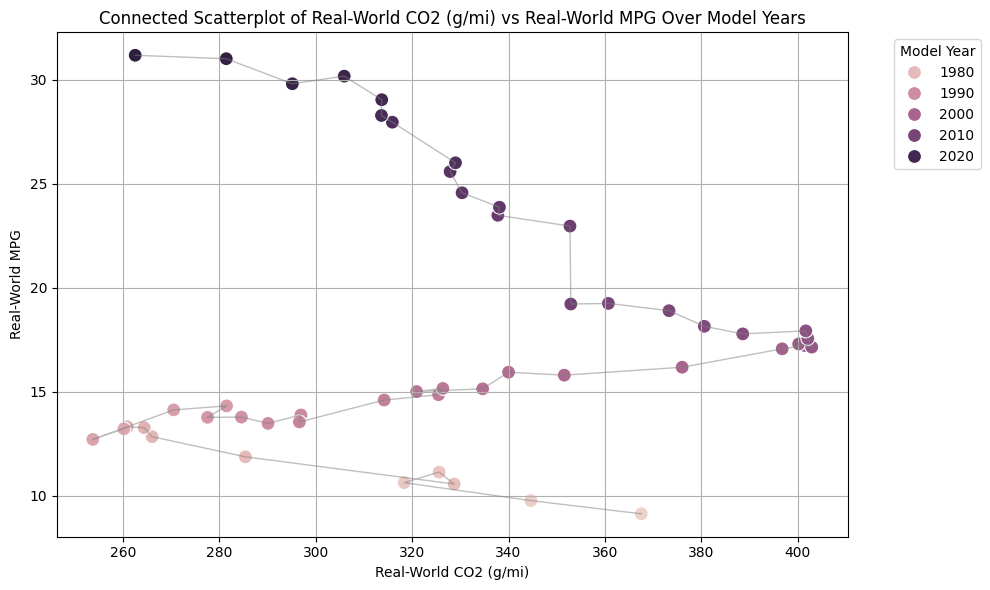

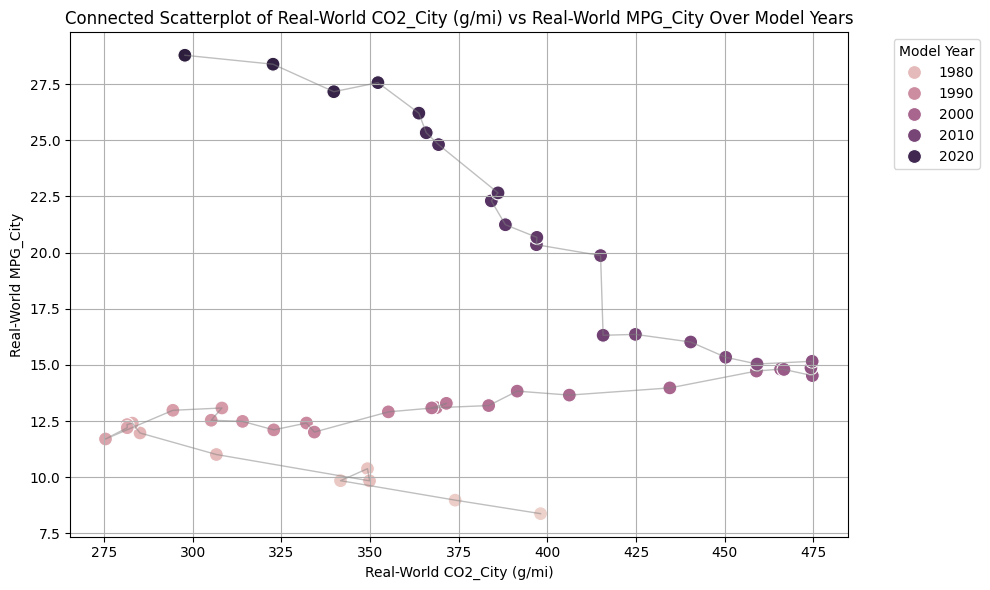

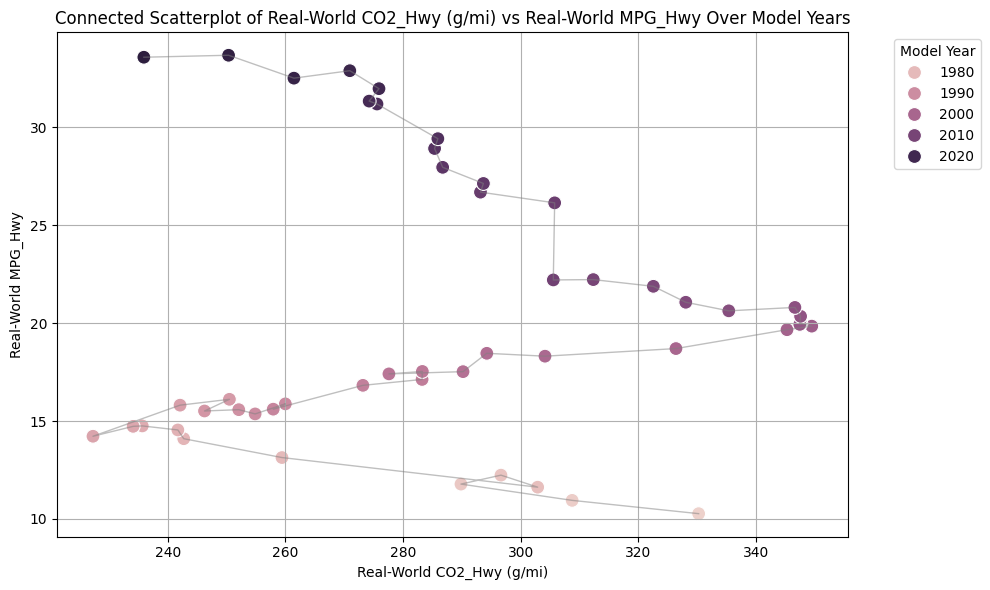

In [ ]:
CO2import matplotlib.pyplot as plt
import seaborn as sns

# Use the emissions_fuel_by_year table which has average CO2 and MPG per model year
# emissions_fuel_by_year was created in cell pDaAEMr9GKrT

# Define the pairs of CO2 and MPG metrics to plot
metric_pairs = [
    ('Real-World CO2 (g/mi)_noNull', 'Real-World MPG_noNull'),
    ('Real-World CO2_City (g/mi)_noNull', 'Real-World MPG_City_noNull'),
    ('Real-World CO2_Hwy (g/mi)_noNull', 'Real-World MPG_Hwy_noNull')
]

for co2_metric, mpg_metric in metric_pairs:
    plt.figure(figsize=(10, 6))

    # Create a scatterplot
    sns.scatterplot(data=emissions_fuel_by_year, x=co2_metric, y=mpg_metric, hue='Model Year (Renew)', s=100) # Color points by year, size for emphasis

    # Connect the points in chronological order
    plt.plot(emissions_fuel_by_year[co2_metric], emissions_fuel_by_year[mpg_metric], color='gray', linestyle='-', linewidth=1, alpha=0.5)

    plt.title(f'Connected Scatterplot of {co2_metric.replace("_noNull", "")} vs {mpg_metric.replace("_noNull", "")} Over Model Years')
    plt.xlabel(co2_metric.replace('_noNull', ''))
    plt.ylabel(mpg_metric.replace('_noNull', ''))
    plt.grid(True)
    plt.legend(title='Model Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Chart 5 - Takeaway
Over time the Miles Per Gallon (MPG) for all, City, and Highway (Hwy) increases while the Carbon Dioxide emissions went back and forth with a jaggedy decrease between 2000 to 2020.

## Chart 5 - Design Decision
The use of the connected line chart easily helps interpret the changes of MPG and CO2 overtime. Additionally, Data points were colored to an associated year in order to better see when changes in the relationship occurred throughout the line.

## Chart 5 - Additional Insights
Limitations : This chart shows the average for all cars in a given year. It doesn't tell you about the spread or variation within that year, like if there were some super efficient cars and some really bad ones. It's just the middle ground. Also, it doesn't show why these changes happened, like if it was new tech or just different types of cars being popular.

Others : You can see the general trend is up and to the left, meaning lower CO2 and higher MPG. The plots for city and highway driving show slightly different patterns, which makes sense because cars perform differently in those conditions.
